# **_Computing the Determinant of 'Singular' Matrices_**

<hr style="height: 0; box-shadow: 0 0 5px 4px crimson; width: 95%;">

## **_Goals:_**

-   Using a `for` loop, iterate over each lambda value in `lambdas = np.linspace(0, .1, 30)`.

-   For each value of $\lambda$:

    -   Generate a random square matrix `S` of dimensions `20x20`.

    -   Impose linear dependence to make `S` singular, where we expect determinant to be `0`.

    -   Scalar-multiply the identity matrix by that value of $\lambda$, giving us `ID_LAM`.

    -   Shift `S` by adding `ID_LAM`, giving us `S_SHIFT`.

    -   Compute the determinant of `S_SHIFT`.

    -   Repeat this process `1000` times for each $\lambda$ and calculate the average determinant to ensure robustness against fluctuations around `0`.

-   Plot the average determinants (y-axis) against $\lambda$ (x-axis).

-   What do we notice?

<hr style="height: 0; box-shadow: 0 0 5px 4px crimson; width: 95%;">

This Python Jupyter notebook extrapolates from an exercise in Mike X. Cohen's Linear Algebra course on Udemy.

-   Udemy course: https://www.udemy.com/course/linear-algebra-theory-and-implementation

-   Professor Cohen's website: https://www.mikexcohen.com/

<hr style="height: 0; box-shadow: 0 0 5px 4px crimson; width: 95%;">

## **_Code:_**

In [1]:
import matplotlib.pyplot as plt
import numpy as np

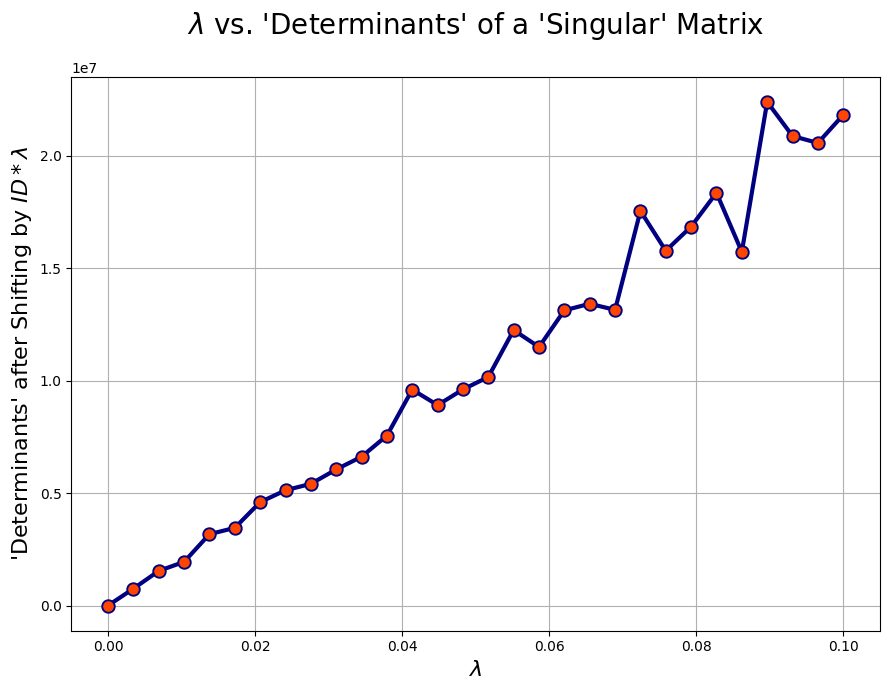

In [2]:
# Number of lambdas (shifters) to use:
num_lambdas = 30

# Number of matrices to test, then average,
#  for each lambda:
mats_to_avg = 1000

# Square matrix rows/cols:
mat_dim = 20

# Final array of average determinants accumulated
#  from each round of tests:
avg_dets = np.zeros(num_lambdas)

# Instantiate array to populate determinants,
#  which we'll take the average of, to use and
#  overwrite for each round of tests:
det_lam = np.zeros(mats_to_avg)

# Array of shift/lambda values to iterate over:
lambdas = np.linspace(0, 0.1, num_lambdas)

# Iterate over lambdas:
for li in range(len(lambdas)):
    # For each lambda, run multiple tests:
    for ti in range(mats_to_avg):
        # Instantiate matrix for each subtest:
        S = np.random.randn(mat_dim, mat_dim)
        # Swap two rows:
        S[[3], :] = S[[13], :]
        # Get sum of matrix with the Identity
        #  matrix, then multiply by lambda scalar:
        ID_LAM = lambdas[li] * np.eye((mat_dim))
        S_SHIFT = S + ID_LAM
        # Add absolute value of determinant to temp
        #  array for averaging:
        det_lam[ti] = abs(np.linalg.det(S_SHIFT))
    # Take the average and save this value
    #  for plotting:
    avg_dets[li] = np.mean(det_lam)

# Plot the lambdas against the average magnitudes
#  of the determinants:
plt.figure(figsize=(9, 7))
plt.plot(
    lambdas,
    avg_dets,
    "o-",
    color="navy",
    markersize=9,
    markerfacecolor="orangered",
    markeredgewidth=1.35,
    linewidth=3,
)
plt.xlabel("$\\lambda$", size=16)
plt.ylabel("'Determinants' after Shifting by $ID * \\lambda$", size=16)
plt.title("$\\lambda$ vs. 'Determinants' of a 'Singular' Matrix\n", size=20)

plt.grid("gainsboro")
plt.tight_layout()
plt.show()

<hr style="height: 0; box-shadow: 0 0 5px 4px crimson; width: 95%;">

## **_Analysis:_**

-   Shifting a matrix by the identity matrix has no effect on the matrix rank or determinant.

-   When including $\lambda$ in our calculations, the (average) determinants should remain `0` since we've force linear dependence in our matrices.

-   But as $\lambda$ increases and we shift the matrices further, the computed determinant grows larger and larger, even though we've curated singular matrices.

-   Small changes in $\lambda$ have dramatically affected the determinant.

-   The computed determinant via `np.linalg.det()`, is sensitive to shifts/perturbations.

-   Python has only so much dataspace to hold floating point numbers, and we're noticing how this limitation affects our calculations.

-   We'll need better ways to measure the determinant of (nearly) singular matrices.

-   But we've also learned that we can a matrix less singular, more towards full-rank, with this technique. It will be important to learn when to employ this regularization tool.

-   As my education progresses, I'll work on finding more numerically stable and reliable ways for dealing with ill-conditioned matrices and how this relates to Statistics, Machine Learning and other areas...

<hr style="height: 0; box-shadow: 0 0 5px 4px crimson; width: 95%;">

<hr style="height: 0; box-shadow: 0 0 5px 4px dodgerblue; width: 85%;">

<hr style="height: 0; box-shadow: 0 0 5px 4px #5EDC1F; width: 75%;">


<hr style="height: 0; box-shadow: 0 0 5px 4px magenta; width: 65%;">


<hr style="height: 0; box-shadow: 0 0 5px 4px gold; width: 55%;">

<font size=2>

_Andrew Blais, Boston, Massachusetts_

GitHub: https://github.com/andrewblais

Website/Python Web Development Porfolio: https://www.andrewblais.dev/

</font>